# #Proyecto 1 Admin. Bases de Datos

Importación de librerías

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TKAgg')
import pandas as pd
import psycopg2 as pg2
import numpy as np
import time as t
from matplotlib.ticker import FuncFormatter

Se inicializa la conexión con la DB

In [2]:
conn = pg2.connect(host='localhost', dbname="sambilproyecto", user="postgres", password="1234")
cur = conn.cursor()

Ahora unos resultados de vistas y gráficos:

Vista Obligatoria 1: Porcentaje de ventas hecho a personas con smartphone y sin smartphone 

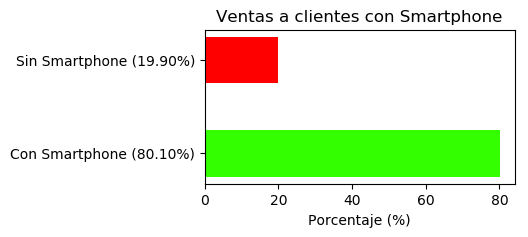

,Sin Smartphone,Con Smartphone
0,19.90,80.10


In [3]:
cur.execute('SELECT * FROM porcentajeventassmartphone;')

data=cur.fetchone()
labels=('Sin Smartphone ('+str(data[0])+'%)','Con Smartphone ('+str(data[1])+'%)')

y_pos = np.arange(len(labels))

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,2))

ax.barh(y_pos, data, height=0.5, align='center', color=['#FF0000','#33FF00'])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Porcentaje (%)')
ax.set_title('Ventas a clientes con Smartphone')

df = pd.DataFrame([data], columns=('Sin Smartphone','Con Smartphone'))

plt.show()

df

Vista Obligatoria 2: Top 5 personas que más tiempo han pasado en el centro comercial en el último mes.

In [4]:
cur.execute("SELECT * FROM top5mastiempo;")
data = cur.fetchall()

labels=('id de Smartphone','Tiempo en el CC')
df = pd.DataFrame(data)

df

,0,1
0,51,1 days 00:42:00
1,9,0 days 23:12:00
2,17,0 days 22:22:00
3,57,0 days 21:53:00
4,210,0 days 21:42:00


Vista Extra 1: Top 5 franquicias cuyos han facturado una mayor cantidad de compras en el último mes.

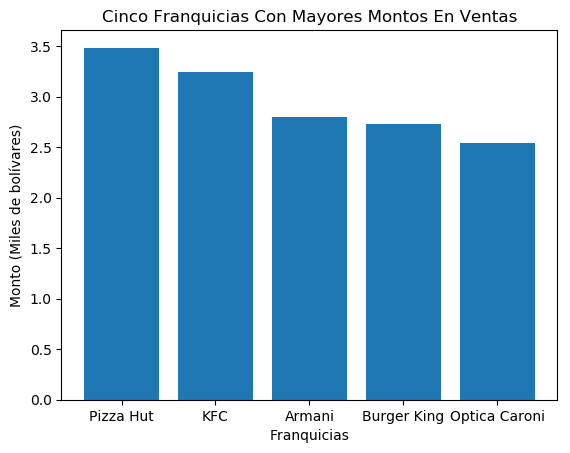

In [6]:
cur.execute("SELECT * FROM top5franquiciasventas;")
data = cur.fetchall()

label = ('Franquicia','Ventas Totales')
x = np.arange(len(data))
montos = []
franquicias = []

for val in data:
    montos.append(val[1])
    franquicias.append(val[0])

def miles(x, pos):
    return '%1.1f' % ( x * 1e-3 )

formatter = FuncFormatter(miles)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(formatter)
plt.bar(x, montos)
plt.xticks(x, franquicias)

ax.set_xlabel('Franquicias')
ax.set_ylabel('Monto (Miles de bolívares)')
ax.set_title('Cinco Franquicias Con Mayores Montos En Ventas')

plt.show()

Vista Extra 2: Mostrar por sector cual es el cliente que más tiempo ha pasado en uno de los locales de ese sector.

In [7]:
cur.execute("SELECT * FROM mastiempoporsector;")

data = cur.fetchall()
labels = ('Sector','Id Smartphone','Tiempo')
df = pd.DataFrame(data, columns=labels)

df

,Sector,Id Smartphone,Tiempo
0,Plaza Venezuela,226,15:37:00
1,Plaza Colombia,31,15:33:00
2,Plaza Brasil,84,14:51:00


Las siguientes tres vistas (3,4 y 5) funcionan mientras el script está en ejecución

Vista Extra 3: Cantidad de clientes en el centro comercial.
Vista Extra 4: Cantidad de clientes sentados en mesas de la feria y dentro de locales

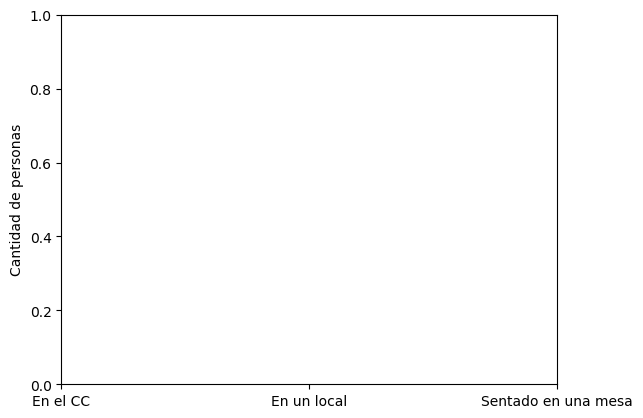

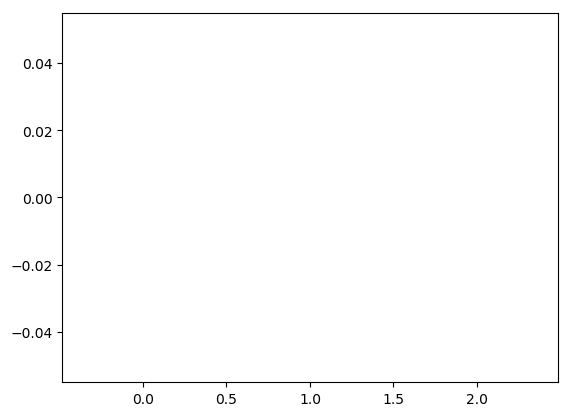

In [9]:
def animated_bar():
    
    N = 3
    cur.execute("SELECT * FROM smartphonesencc;")
    incc = cur.fetchone()[0]
    
    cur.execute("SELECT * FROM enccenmesaoenlocal;")
    
    response = cur.fetchone()
    inlocal = response[0]
    inmesa = response[1]
    
    x = (incc, inlocal, inmesa)
    
    bars = plt.bar(range(N), x, width=0.7, align='center')
    for bar, h in zip(bars, x):
        bar.set_height(h)
    fig.canvas.draw()

fig, ax = plt.subplots()
x = np.arange(3)
ax.set_ylabel('Cantidad de personas')
plt.xticks(x, ('En el CC','En un local','Sentado en una mesa'))
plt.show()

i = 0

while i < 20:
    animated_bar()
    i+=1
    t.sleep(0.5)

Vista Extra 5: Cantidad de mesas ocupadas

In [10]:
cur.execute("SELECT * FROM cantidadmesasocupadas;")
data = cur.fetchall()
labels = ('Mesas ocupadas')

df = pd.DataFrame(data)

df

,0
0,0


Vista Extra 6: Top 5 franquicias cuyos locales generen mayor flujo de clientes

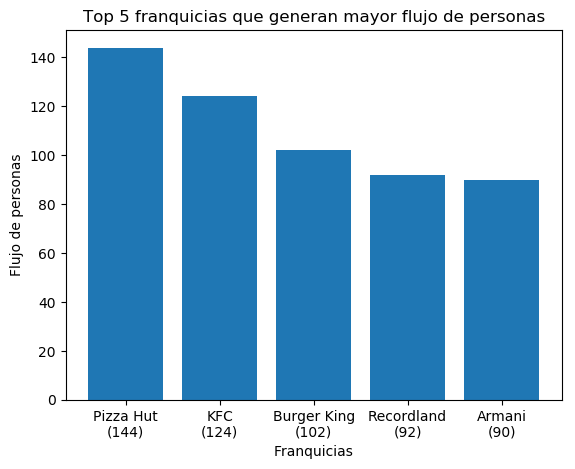

In [12]:
cur.execute("SELECT * FROM top5localesflujopersonas;")

data = cur.fetchall()

label = ('Franquicia','Flujo de personas')
x = np.arange(len(data))
flujo = []
franquicias = []

for val in data:
    flujo.append(val[1])
    franquicias.append(val[0]+'\n('+str(val[1])+')')

fig, ax = plt.subplots()

plt.bar(x, flujo)
plt.xticks(x, franquicias)

ax.set_xlabel('Franquicias')
ax.set_ylabel('Flujo de personas')
ax.set_title('Top 5 franquicias que generan mayor flujo de personas')

plt.show()